In [20]:
# Import all necessary packages.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

from sb_utils import save_file

In [21]:
# Import and display the preprocessed housing prices data, as well as the train and test splits.
# Raw original data source: https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features

house_data = pd.read_csv('house_data_preprocessed.csv')
house_data

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,452600.0,83252.0,41.000000,880,129,322,126,37.88,-122.23,5.76,345.81,457.02,41.90,13.20
1,358500.0,83014.0,21.000000,7099,1106,2401,1138,37.86,-122.22,6.35,344.41,455.61,40.42,12.97
2,352100.0,72574.0,26.983847,1467,190,496,177,37.85,-122.24,5.13,344.62,455.79,40.31,11.69
3,341300.0,56431.0,26.983847,1274,235,558,219,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
4,342200.0,38462.0,26.983847,1627,280,565,259,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,78100.0,15603.0,25.000000,1665,374,845,330,39.48,-121.09,100.68,406.71,516.13,154.42,138.33
19671,77100.0,25568.0,18.000000,697,150,356,114,39.49,-121.21,99.70,409.95,519.62,153.39,135.65
19672,92300.0,17000.0,17.000000,2254,485,1007,433,39.43,-121.22,95.54,406.40,516.17,149.24,131.79
19673,84700.0,18672.0,18.000000,1860,409,741,349,39.43,-121.32,94.45,408.68,518.64,148.01,129.20


In [22]:
X_train = pd.read_csv('house_data_preprocessed_X_train.csv')
y_train = pd.read_csv('house_data_preprocessed_y_train.csv')
X_test = pd.read_csv('house_data_preprocessed_X_test.csv')
y_test = pd.read_csv('house_data_preprocessed_y_test.csv')
X_train

,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,0.347800,0.240000,0.067704,0.080087,0.041061,0.085362,0.189160,0.585657,0.100989,0.035275,0.179909,0.544218,0.579302
1,0.178861,0.640000,0.036396,0.045941,0.023011,0.049342,0.545165,0.335657,0.192332,0.463096,0.543656,0.105429,0.141409
2,0.248446,0.500000,0.026858,0.035698,0.024889,0.039638,0.255048,0.388446,0.057921,0.220646,0.326984,0.353548,0.399886
3,0.193472,0.060000,0.059515,0.092038,0.042462,0.089309,0.069075,0.706175,0.033856,0.129510,0.044348,0.745395,0.765560
4,0.116755,0.540000,0.039676,0.100264,0.055243,0.097862,0.164718,0.603586,0.064046,0.005471,0.154460,0.580246,0.612658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,0.094443,0.200000,0.023323,0.030576,0.001850,0.006743,0.812965,0.325697,0.715457,0.714069,0.753279,0.388152,0.323836
13768,0.186143,0.519677,0.020652,0.033214,0.009081,0.029441,0.639745,0.285857,0.162816,0.568415,0.632985,0.167825,0.133087
13769,0.081991,0.760000,0.043975,0.074965,0.059194,0.078289,0.130712,0.605578,0.003762,0.030516,0.130100,0.614388,0.644144
13770,0.242849,0.080000,0.029198,0.047959,0.018078,0.039967,0.526036,0.241036,0.037039,0.497296,0.572441,0.020247,0.059603


In [23]:
y_train

,Median_House_Value
0,325200.0
1,109100.0
2,120600.0
3,216100.0
4,112500.0
...,...
13767,137500.0
13768,125000.0
13769,141300.0
13770,300000.0


__Objective for this step__: The dependent variable, median house value, is a quantitative variable presumably correlated to some combination of the other provided features. We will therefore perform linear regression to find a model of best fit amongst these features to predict median house value.

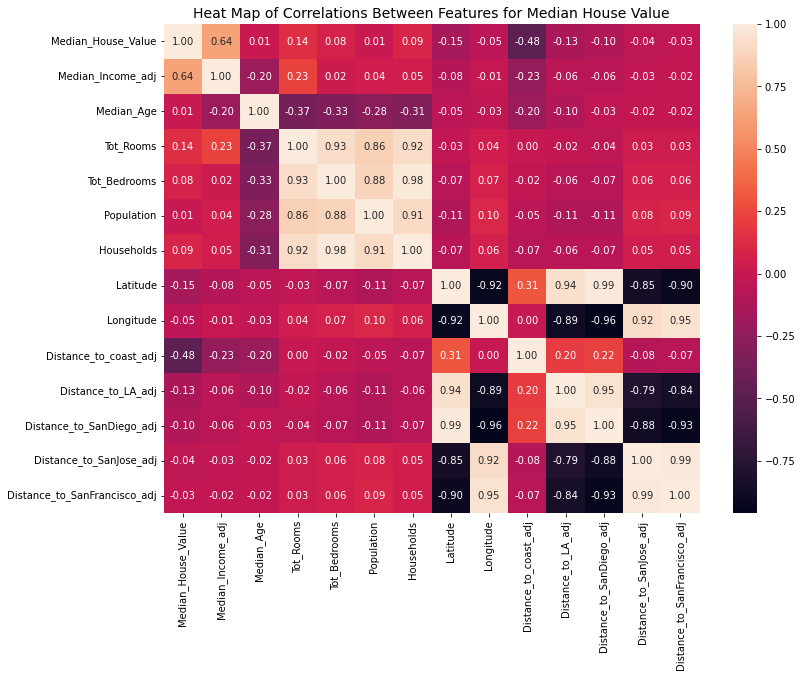

In [34]:
# Remind myself of the correlations between each pair of variables.

f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(round(house_data.corr(), 2), annot = True, fmt = '.2f')
plt.title('Heat Map of Correlations Between Features for Median House Value', fontsize = 14)
plt.show()

In [25]:
# Since we will be using statsmodels' OLS package, add a column of constants to the two sets of independent variables.

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train

,const,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,1.0,0.347800,0.240000,0.067704,0.080087,0.041061,0.085362,0.189160,0.585657,0.100989,0.035275,0.179909,0.544218,0.579302
1,1.0,0.178861,0.640000,0.036396,0.045941,0.023011,0.049342,0.545165,0.335657,0.192332,0.463096,0.543656,0.105429,0.141409
2,1.0,0.248446,0.500000,0.026858,0.035698,0.024889,0.039638,0.255048,0.388446,0.057921,0.220646,0.326984,0.353548,0.399886
3,1.0,0.193472,0.060000,0.059515,0.092038,0.042462,0.089309,0.069075,0.706175,0.033856,0.129510,0.044348,0.745395,0.765560
4,1.0,0.116755,0.540000,0.039676,0.100264,0.055243,0.097862,0.164718,0.603586,0.064046,0.005471,0.154460,0.580246,0.612658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,1.0,0.094443,0.200000,0.023323,0.030576,0.001850,0.006743,0.812965,0.325697,0.715457,0.714069,0.753279,0.388152,0.323836
13768,1.0,0.186143,0.519677,0.020652,0.033214,0.009081,0.029441,0.639745,0.285857,0.162816,0.568415,0.632985,0.167825,0.133087
13769,1.0,0.081991,0.760000,0.043975,0.074965,0.059194,0.078289,0.130712,0.605578,0.003762,0.030516,0.130100,0.614388,0.644144
13770,1.0,0.242849,0.080000,0.029198,0.047959,0.018078,0.039967,0.526036,0.241036,0.037039,0.497296,0.572441,0.020247,0.059603


In [137]:
# Define general function to easily plot predictions.

def plot_results(y_test, y_pred, plot_title):
    plt.figure(figsize = (8, 8))
    plt.scatter(y_test, y_pred)
    plt.plot([x for x in range(0, 500000)], [y for y in range(0, 500000)], color = 'red')
    plt.axhline(y = 0, color = 'green')
    plt.title(plot_title)
    plt.xlabel('Actual median house values')
    plt.ylabel('Predicted median house values')
    plt.show()

In [145]:
# Define function to calculate RMSE between predicted and actual median house values.

def rmse(y_pred, y_test):
    comparisons = y_test.copy()
    comparisons.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
    comparisons['pred'] = y_pred
    return "Average difference between predicted and actual median house values: " + str(np.sqrt(((comparisons['pred'] - comparisons['actual']) ** 2).mean()))

__1st model__: Create a linear regression model using all features, to have a baseline.

In [28]:
# Build the model.

LRmodel_all = sm.OLS(y_train, X_train)

LRmodel_all_results = LRmodel_all.fit()

LRmodel_all_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1651.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:39:01   Log-Likelihood:            -1.7122e+05
No. Observations:               13772   AIC:                         3.425e+05
Df Residuals:                   13758   BIC:                         3.426e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2.587e+05   1.26e+04     20.497      0.000    2.34e+05    2.83e+05
Median_Income_adj             4.787e+05   5725.040     83.611      0.000    4.67e+05     4.9e+05
Median_Age                    1.959e+04   2730.902      7.174      0.000    1.42e+04    2.49e+04
Tot_Rooms                    -2.683e+05   3.43e+04     -7.820      0.000   -3.36e+05   -2.01e+05
Tot_Bedrooms                  5.557e+05   4.72e+04     11.776      0.000    4.63e+05    6.48e+05
Population                   -1.297e+06    4.4e+04    -29.450      0.000   -1.38e+06   -1.21e+06
Households                    3.366e+05   4.81e+04      7.006      0.000    2.42e+05    4.31e+05
Latitude                     -3.958e+05   2.81e+04    -14.082      0.000   -4.51e+05   -3.41e+05
Longitude                    -2.425e+05   1.79e+04    -13.563      0.000   -2.78e+05   -2.07e+05
Distance_to_coast_adj        -7.831e+04   7031.452    -11.137      0.000   -9.21e+04   -6.45e+04
Distance_to_LA_adj           -1.555e+05   8356.053    -18.610      0.000   -1.72e+05   -1.39e+05
Distance_to_SanDiego_adj      2.934e+05   3.57e+04      8.224      0.000    2.23e+05    3.63e+05
Distance_to_SanJose_adj       1.567e+05   2.07e+04      7.589      0.000    1.16e+05    1.97e+05
Distance_to_SanFrancisco_adj -1.536e+05   2.38e+04     -6.444      0.000      -2e+05   -1.07e+05
==============================================================================
Omnibus:                     2670.782   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6649.046
Skew:                           1.073   Prob(JB):                         0.00
Kurtosis:                       5.642   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Use the model to predict median house value among the test set.

y_pred_all = LRmodel_all_results.predict(X_test)

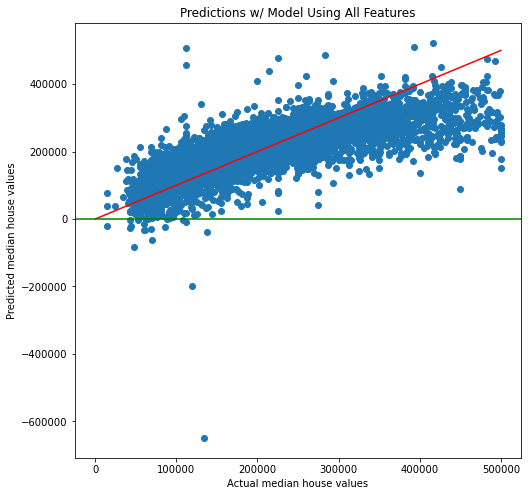

In [138]:
# Plot predictions for model that uses all features.

plot_results(y_test, y_pred_all, 'Predictions w/ Model Using All Features')

In [146]:
# Calculate the RMSE of this model.

rmse(y_pred_all, y_test)

'Average difference between predicted and actual median house values: 62431.91679260641'

__Takeaways of 1st model__:

 - From eyeballing the plot:
    - The predicted median house values have a large spread in either direction compared to what they actually are, appearing to be up to several hundred thousand off.
    - There are many negative predictions, including a couple that are approximately -200,000 and -650,000, obviously none of which can be accurate. Since this is purely a baseline model, we won't delve into what is driving the negative predictions.
    - The model appears to underpredict more and more as the actual value increases, entirely underpredicting after actual values increase to ~425,000.
 - The summary statistics give an R-squared value of 0.609. This correlation could be considered middle of the road, boosted by the fact that we are considering all of the features that actually matter, but also all of the features that don't.
 - The summary statistics give an F-statistic of 1,651 and a p-value of ~0. This indicates that the model is much stronger than one that is purely random.
 - The RMSE is 62,432, indicating that on average the actual value is 62,432 away from the predicted. Considering that the actual median house values range from 14,999 to 500,000, this is not very good.

__2nd model__: Create a linear regression model using the two features that may have some distinct correlation with the dependent variable, median income and distance to coast.

In [41]:
# Declare features to use in both training and test sets.

X_train_discorr = X_train[['Median_Income_adj', 'Distance_to_coast_adj']]
X_test_discorr = X_test[['Median_Income_adj', 'Distance_to_coast_adj']]
X_train_discorr

,Median_Income_adj,Distance_to_coast_adj
0,0.347800,0.100989
1,0.178861,0.192332
2,0.248446,0.057921
3,0.193472,0.033856
4,0.116755,0.064046
...,...,...
13767,0.094443,0.715457
13768,0.186143,0.162816
13769,0.081991,0.003762
13770,0.242849,0.037039


In [39]:
# Build the model.

LRmodel_discorr = sm.OLS(y_train, X_train_discorr)

LRmodel_discorr_results = LRmodel_discorr.fit()

LRmodel_discorr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Median_House_Value   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                          4.491e+04
Date:                Wed, 19 Oct 2022   Prob (F-statistic):                        0.00
Time:                        16:28:32   Log-Likelihood:                     -1.7476e+05
No. Observations:               13772   AIC:                                  3.495e+05
Df Residuals:                   13770   BIC:                                  3.495e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Median_Income_adj      7.467e+05   2766.758    269.873      0.000    7.41e+05    7.52e+05
Distance_to_coast_adj -8.342e+04   3923.992    -21.260      0.000   -9.11e+04   -7.57e+04
==============================================================================
Omnibus:                     1659.713   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3635.723
Skew:                           0.736   Prob(JB):                         0.00
Kurtosis:                       5.042   Cond. No.                         1.93
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Use the model to predict median house value among the test set.

y_pred_discorr = LRmodel_discorr_results.predict(X_test_discorr)

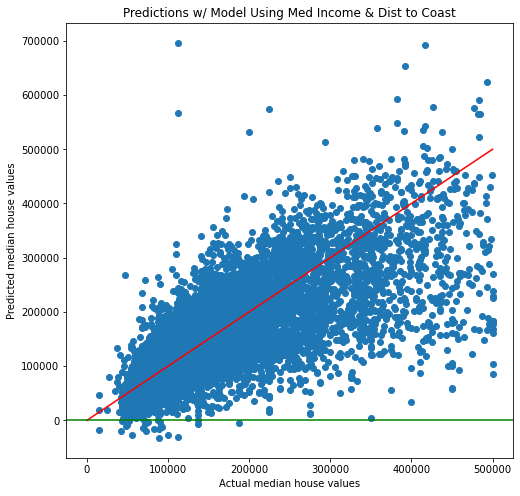

In [139]:
# Plot predictions for model that uses the two features with potentially distinct correlation.

plot_results(y_test, y_pred_discorr, 'Predictions w/ Model Using Med Income & Dist to Coast')

In [84]:
# Take a deeper look at the negative predictions.

comparisons_discorr = y_test.copy()
comparisons_discorr.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
comparisons_discorr['Median_Income_adj'] = X_test['Median_Income_adj']
comparisons_discorr['Distance_to_coast_adj'] = X_test['Distance_to_coast_adj']
comparisons_discorr['pred'] = y_pred_discorr
comparisons_discorr['diff'] = comparisons_discorr['actual'] - comparisons_discorr['pred']
temp_col_names = ['Median_Income_adj', 'Distance_to_coast_adj', 'actual', 'pred', 'diff']
comparisons_discorr = comparisons_discorr[temp_col_names]
comparisons_discorr

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
0,0.105615,0.070364,104200.0,72990.031820,31209.968180
1,0.293411,0.034193,171200.0,216229.481600,-45029.481600
2,0.280539,0.243019,97300.0,189197.383221,-91897.383221
3,0.240208,0.030625,102700.0,176801.987049,-74101.987049
4,0.134419,0.189486,116500.0,84559.141101,31940.858899
...,...,...,...,...,...
5898,0.077326,0.356258,66000.0,28016.645797,37983.354203
5899,0.159498,0.018568,330800.0,117544.029037,213255.970963
5900,0.290572,0.122209,144400.0,206767.499085,-62367.499085
5901,0.266853,0.058355,200000.0,194383.647093,5616.352907


In [85]:
comparisons_discorr[comparisons_discorr['pred'] < 0].sort_values(by = 'actual')

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
3717,0.002854,0.235399,14999.0,-17506.728699,32505.728699
1247,0.025720,0.465107,42500.0,-19596.730295,62096.730295
3747,0.058073,0.522546,43300.0,-231.059541,43531.059541
2862,0.043344,0.516422,48500.0,-10718.473725,59218.473725
4447,0.056152,0.531372,49100.0,-2401.901862,51501.901862
5371,0.028780,0.363009,49400.0,-8794.632113,58194.632113
744,0.052246,0.475283,51700.0,-639.128244,52339.128244
850,0.022146,0.530842,55500.0,-27748.963088,83248.963088
2096,0.036109,0.499301,69000.0,-14691.968044,83691.968044
5322,0.047147,0.496841,72300.0,-6245.373404,78545.373404


In [86]:
# Take a deeper look at the more extreme differences.

comparisons_discorr[comparisons_discorr['diff'] < -200000].sort_values(by = 'diff', ascending = False)

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
5789,0.536931,0.523607,155600.0,357231.036747,-201631.036747
301,0.532678,0.287388,171900.0,373761.227728,-201861.227728
366,0.566367,0.182879,204800.0,407634.980196,-202834.980196
2666,0.612012,0.185387,235200.0,441507.161216,-206307.161216
3519,0.819392,0.232698,381800.0,592405.388768,-210605.388768
902,0.438234,0.012009,110000.0,326216.179703,-216216.179703
746,0.544300,0.196865,172200.0,389991.306572,-217791.306572
1542,0.614637,0.540005,193500.0,413883.531953,-220383.531953
247,0.696769,0.075428,293500.0,513966.804944,-220466.804944
3280,0.382478,0.208102,47500.0,268225.199469,-220725.199469


In [78]:
len(comparisons_discorr[comparisons_discorr['diff'] > 200000])

147

In [87]:
comparisons_discorr[comparisons_discorr['diff'] > 300000].sort_values(by = 'diff')

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
3537,0.150026,0.059609,410700.0,107047.672135,303652.327865
4362,0.129224,0.006897,400000.0,95912.851361,304087.148639
4235,0.254273,0.005787,494400.0,189376.484428,305023.515572
3903,0.241157,0.126549,476700.0,169507.993856,307192.006144
5130,0.203553,0.021413,457700.0,150201.426145,307498.573855
5727,0.206139,0.001061,464300.0,153829.747856,310470.252144
3536,0.175959,0.009694,444400.0,130575.587035,313824.412965
2767,0.247086,0.009887,500000.0,183668.141995,316331.858005
822,0.223493,0.001592,483300.0,166743.859620,316556.140380
2382,0.246067,0.008922,500000.0,182987.046364,317012.953636


In [149]:
# Calculate the RMSE of this model.

rmse(y_pred_discorr, y_test)

'Average difference between predicted and actual median house values: 79468.35564100769'

__Takeaways of 2nd model__:

 - From eyeballing the plot: 
    - The predicted median house values, when the actual value is ~200,000 or less, have much less spread in either direction compared to the baseline, appearing to be generally 50,000-100,000 off. However, as the actual value increases past 200,000, the spread greatly increases to once again being several hundreds of thousands off.
    - There are much fewer negative predictions, only 22, all of which are not extremely negative, and all for actual values of less than 200,000. The model seems to do a good job of not extremely underpredicting. However...
    - The model still appears to underpredict more and more as the actual value increases, and while not entirely unpredicting at any point, to underpredict with more and more difference.
    - There are four actual values that were overpredicted by more than 300,000, with the largest overprediction having a difference of 583,995. Because there are many fewer overpredictions compared to underpredictions, it may make more to sense to focus on the latter for now.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase. Perhaps taking the log of a feature could straighten it out.
 - The summary statistics give an R-squared value of 0.867. This correlation is much better than that of the previous model and quite good on its own.
 - The summary statistics give an F-statistic of 4,491 and a p-value of ~0. This indicates that the model is much stronger than one that is purely random.
 - The RMSE is 79,468, indicating that on average the actual value is 79,468 away from the predicted. Despite having a much higher R-squared value than the previous model, this model actually has a worse RMSE. This is likely driven by the differences in the higher actual values, as visualized by the plot, which shows them fanning out more as the actual value increases.

__3rd model__: Create a linear regression model using the two features that may have some distinct correlation with the dependent variable, median income and distance to coast, and also taking the log of the latter feature.

In [163]:
# Declare features to use in both training and test sets.

X_train_discorr_logDtc = pd.DataFrame()
X_train_discorr_logDtc['Median_Income_adj'] = X_train['Median_Income_adj']
X_train_discorr_logDtc['Distance_to_coast_adj'] = X_train['Distance_to_coast_adj']
X_train_discorr_logDtc['Median_House_Value'] = y_train['Median_House_Value']                                     # Doing this so that the next line evens the lengths of the X and y sets.
X_train_discorr_logDtc = X_train_discorr_logDtc[X_train_discorr_logDtc['Distance_to_coast_adj'] > 0]             # Doing this so that taking the log of 'Distance_to_coast_adj' doesn't result in -inf values.
X_train_discorr_logDtc['Distance_to_coast_adj_log'] = np.log10(X_train_discorr_logDtc['Distance_to_coast_adj'])

X_test_discorr_logDtc = pd.DataFrame()
X_test_discorr_logDtc['Median_Income_adj'] = X_test['Median_Income_adj']
X_test_discorr_logDtc['Distance_to_coast_adj'] = X_test['Distance_to_coast_adj']
X_test_discorr_logDtc['Median_House_Value'] = y_test['Median_House_Value']                                       # Doing this so that the next line evens the lengths of the X and y sets.
X_test_discorr_logDtc = X_test_discorr_logDtc[X_test_discorr_logDtc['Distance_to_coast_adj'] > 0]                # Doing this so that taking the log of 'Distance_to_coast_adj' doesn't result in -inf values.
X_test_discorr_logDtc['Distance_to_coast_adj_log'] = np.log10(X_test_discorr_logDtc['Distance_to_coast_adj'])

y_train_logDtc = pd.DataFrame(X_train_discorr_logDtc['Median_House_Value'])
y_test_logDtc = pd.DataFrame(X_test_discorr_logDtc['Median_House_Value'])
X_train_discorr_logDtc = X_train_discorr_logDtc.drop(columns = ['Distance_to_coast_adj', 'Median_House_Value'])
X_test_discorr_logDtc = X_test_discorr_logDtc.drop(columns = ['Distance_to_coast_adj', 'Median_House_Value'])

In [164]:
# Build the model.

LRmodel_discorr_logDtc = sm.OLS(y_train_logDtc, X_train_discorr_logDtc)

LRmodel_discorr_logDtc_results = LRmodel_discorr_logDtc.fit()

LRmodel_discorr_logDtc_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Median_House_Value   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                          7.035e+04
Date:                Wed, 19 Oct 2022   Prob (F-statistic):                        0.00
Time:                        19:31:32   Log-Likelihood:                     -1.7198e+05
No. Observations:               13770   AIC:                                  3.440e+05
Df Residuals:                   13768   BIC:                                  3.440e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Median_Income_adj          4.414e+05   3755.920    117.510      0.000    4.34e+05    4.49e+05
Distance_to_coast_adj_log -6.997e+04    811.463    -86.231      0.000   -7.16e+04   -6.84e+04
==============================================================================
Omnibus:                     2284.007   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4945.562
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:                       5.189   Cond. No.                         9.15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
# Use the model to predict median house value among the test set.

y_pred_discorr_logDtc = LRmodel_discorr_logDtc_results.predict(X_test_discorr_logDtc)

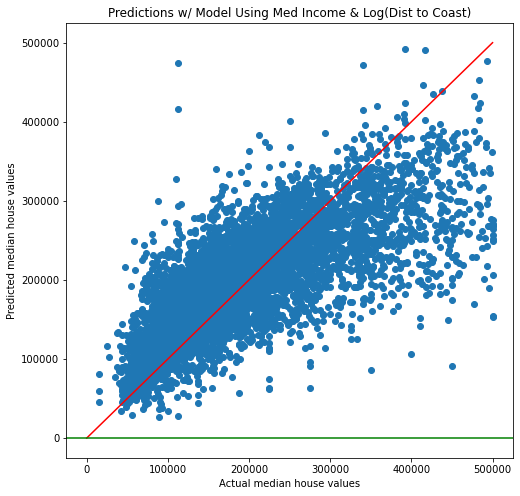

In [166]:
# Plot predictions for model that uses the two features with potentially distinct correlation, with one of them logged.

plot_results(y_test_logDtc, y_pred_discorr_logDtc, 'Predictions w/ Model Using Med Income & Log(Dist to Coast)')

In [173]:
# Take a deeper look at all of the actual vs. predicted values.

comparisons_discorr_logDtc = y_test_logDtc.copy()
comparisons_discorr_logDtc.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
comparisons_discorr_logDtc['Median_Income_adj'] = X_test_discorr_logDtc['Median_Income_adj']
comparisons_discorr_logDtc['Distance_to_coast_adj_log'] = X_test_discorr_logDtc['Distance_to_coast_adj_log']
comparisons_discorr_logDtc['pred'] = y_pred_discorr_logDtc
comparisons_discorr_logDtc['diff'] = comparisons_discorr_logDtc['actual'] - comparisons_discorr_logDtc['pred']
temp_col_names = ['Median_Income_adj', 'Distance_to_coast_adj_log', 'actual', 'pred', 'diff']
comparisons_discorr_logDtc = comparisons_discorr_logDtc[temp_col_names]
comparisons_discorr_logDtc.sort_values(by = 'Median_Income_adj', ascending = False).head(20)

,Median_Income_adj,Distance_to_coast_adj_log,actual,pred,diff
4121,0.951802,-0.769299,112500.0,473917.379990,-361417.379990
4313,0.935285,-1.119423,416700.0,491126.963130,-74426.963130
3362,0.877765,-1.493230,392600.0,491896.462045,-99296.462045
3485,0.839055,-1.518053,493000.0,476548.287071,16451.712929
3519,0.819392,-0.633207,381800.0,405953.975413,-24153.975413
391,0.794699,-1.459372,483100.0,452865.375622,30234.624378
5455,0.780484,-1.294276,426100.0,435038.743014,-8938.743014
4770,0.777645,-1.275311,477600.0,432458.975163,45141.024837
2528,0.774435,-0.460096,382400.0,373998.886207,8401.113793
5822,0.769027,-1.097120,112500.0,416186.623223,-303686.623223


In [167]:
# Calculate the RMSE of this model.

rmse(y_pred_discorr_logDtc, y_test_logDtc)

'Average difference between predicted and actual median house values: 65901.45938214028'

__Takeaways of 3rd model__:

 - From eyeballing the plot: 
    - The spread of predicted median house values as the actual values increase has decreased compared to the previous model.
    - There are no negative predictions. 
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, although it is underpredicting less than does the previous model.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase.
 - The summary statistics give an R-squared value of 0.911. This correlation is even better than that of the previous model, which was already pretty good.
 - The RMSE is 65,901, indicating that on average the actual value is 65,901 away from the predicted. This is better than the previous model's RMSE, although slightly worse than the first model's, while also having the best R-squared value. It's getting hard to tell now whether an RMSE in this range is actually good or bad, since it hasn't varied much across the different models.

__4th model__: Create a linear regression model using the two features that may have some distinct correlation with the dependent variable, median income and distance to coast, and also taking the log of both features.

In [175]:
# Declare features to use in both training and test sets.

X_train_discorr_logboth = pd.DataFrame()
X_train_discorr_logboth['Median_Income_adj'] = X_train['Median_Income_adj']
X_train_discorr_logboth['Distance_to_coast_adj'] = X_train['Distance_to_coast_adj']
X_train_discorr_logboth['Median_House_Value'] = y_train['Median_House_Value']                                       # Doing this so that the next line evens the lengths of the X and y sets.
X_train_discorr_logboth = X_train_discorr_logboth[X_train_discorr_logboth['Distance_to_coast_adj'] > 0]             # Doing this so that taking the log of 'Distance_to_coast_adj' doesn't result in -inf values.
X_train_discorr_logboth = X_train_discorr_logboth[X_train_discorr_logboth['Median_Income_adj'] > 0]                 # Doing this so that taking the log of 'Median_Income_adj' doesn't result in -inf values.
X_train_discorr_logboth['Distance_to_coast_adj_log'] = np.log10(X_train_discorr_logboth['Distance_to_coast_adj'])
X_train_discorr_logboth['Median_Income_adj_log'] = np.log10(X_train_discorr_logboth['Median_Income_adj'])

X_test_discorr_logboth = pd.DataFrame()
X_test_discorr_logboth['Median_Income_adj'] = X_test['Median_Income_adj']
X_test_discorr_logboth['Distance_to_coast_adj'] = X_test['Distance_to_coast_adj']
X_test_discorr_logboth['Median_House_Value'] = y_test['Median_House_Value']                                         # Doing this so that the next line evens the lengths of the X and y sets.
X_test_discorr_logboth = X_test_discorr_logboth[X_test_discorr_logboth['Distance_to_coast_adj'] > 0]                # Doing this so that taking the log of 'Distance_to_coast_adj' doesn't result in -inf values.
X_test_discorr_logboth = X_test_discorr_logboth[X_test_discorr_logboth['Median_Income_adj'] > 0]                    # Doing this so that taking the log of 'Median_Income_adj' doesn't result in -inf values.
X_test_discorr_logboth['Distance_to_coast_adj_log'] = np.log10(X_test_discorr_logboth['Distance_to_coast_adj'])
X_test_discorr_logboth['Median_Income_adj_log'] = np.log10(X_test_discorr_logboth['Median_Income_adj'])

y_train_logboth = pd.DataFrame(X_train_discorr_logboth['Median_House_Value'])
y_test_logboth = pd.DataFrame(X_test_discorr_logboth['Median_House_Value'])
X_train_discorr_logboth = X_train_discorr_logboth.drop(columns = ['Distance_to_coast_adj', 'Median_Income_adj', 'Median_House_Value'])
X_test_discorr_logboth = X_test_discorr_logboth.drop(columns = ['Distance_to_coast_adj', 'Median_Income_adj', 'Median_House_Value'])

,Distance_to_coast_adj_log,Median_Income_adj_log
0,-0.995727,-0.458671
1,-0.715949,-0.747484
2,-1.237161,-0.604767
3,-1.470367,-0.713381
4,-1.193506,-0.932723
...,...,...
13767,-0.145416,-1.024829
13768,-0.788302,-0.730153
13769,-2.424609,-1.086236
13770,-1.431343,-0.614664


In [176]:
# Build the model.

LRmodel_discorr_logboth = sm.OLS(y_train_logboth, X_train_discorr_logboth)

LRmodel_discorr_logboth_results = LRmodel_discorr_logboth.fit()

LRmodel_discorr_logboth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Median_House_Value   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                          3.176e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):                        0.00
Time:                        17:00:16   Log-Likelihood:                     -1.7666e+05
No. Observations:               13763   AIC:                                  3.533e+05
Df Residuals:                   13761   BIC:                                  3.533e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Distance_to_coast_adj_log  -1.56e+05   1099.926   -141.796      0.000   -1.58e+05   -1.54e+05
Median_Income_adj_log      1.031e+04   2023.052      5.095      0.000    6341.260    1.43e+04
==============================================================================
Omnibus:                      280.700   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              539.049
Skew:                           0.128   Prob(JB):                    8.85e-118
Kurtosis:                       3.935   Cond. No.                         4.12
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
# Use the model to predict median house value among the test set.

y_pred_discorr_logboth = LRmodel_discorr_logboth_results.predict(X_test_discorr_logboth)

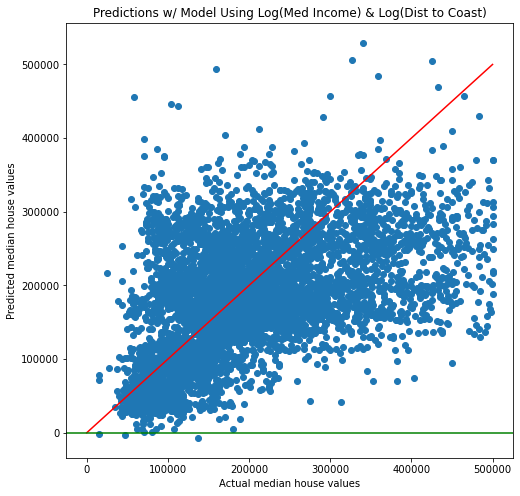

In [178]:
# Plot predictions for model that uses the two features with potentially distinct correlation, with one of them logged.

plot_results(y_test_logboth, y_pred_discorr_logboth, 'Predictions w/ Model Using Log(Med Income) & Log(Dist to Coast)')

In [179]:
# Calculate the RMSE of this model.

rmse(y_pred_discorr_logboth, y_test_logboth)

'Average difference between predicted and actual median house values: 92223.29575586657'

__Takeaways of 4th model__:

 - This model is obviously worse in every metric compared to all previous models, including the baseline, so we won't go into depth.

__Questions__:

 - Is there a more methodical way to consider features to use in the model than just considering their correlation or whether conceptually they might make sense in the model? Using these two lines of reasoning, I could be guessing what the best combination of model features is for hours, but without any quantitative logic to back my decisions, which doesn't seem like a great use of time.
 - Is there a more methodical way to consider whether to logarithmically transform a feature? In this case of considering only two features, taking the log of one feature (distance to coast) greatly improved the model, but subsequently taking the log of the other feature (median income) made a huge mess.
 - Are there other methods of modeling I can consider for this data?
 - Are there other metrics I can consider to gauge my model's goodness of fit?